# Functions for Plotting

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
VariantNames = ['Base','FixedRandomSample','ProportionalRandomSample','Agglomerative','RandomParameters']
ValidFunctions = list(range(1,10))+list(range(20,28))

In [2]:
def TableMediansIterations(DimensionNumber,Tolerance):
    data_medians_iterations = dict()
    for number_function in ValidFunctions:
        iterations_variants = list(IterationsVariants(DimensionNumber,number_function,Tolerance))
        data_medians_iterations[f"F{number_function}"] = iterations_variants
    return data_medians_iterations

def IterationsVariants(DimensionNumber,NumberFunction,Tolerance):
    optimal_value = -(NumberFunction*100+Tolerance)
    for variant_name in VariantNames:
        data_optimal_values = np.loadtxt(f"Dim_{DimensionNumber}/{variant_name}/OptimalValues_F{NumberFunction}.csv",dtype=float,delimiter=',')
        medians_optimal = -np.median(data_optimal_values,axis=0)

        yield medians_optimal.searchsorted(optimal_value)

In [ ]:
def Plot_VariantResults(NumberFunction,FunctionEvaluations_Generation,DimensionNumber=2,Y_Scale='linear'):
    fig , axes = plt.subplots(5,figsize=(8,20),subplot_kw={'yscale':Y_Scale,'xlabel':'Function Evaluations','ylabel':'Function Value'},layout='tight')

    for index_variant , variant_name in enumerate(VariantNames):
        data_optimal_values = np.loadtxt(f"Dim_{DimensionNumber}/{variant_name}/OptimalValues_F{NumberFunction}.csv",dtype=float,delimiter=',')
        Plot_FunctionValues(data_optimal_values,FunctionEvaluations_Generation,variant_name,axes[index_variant])

def Plot_FunctionValues(DataOptimalValues,FunctionEvaluations_Generation,VariantName,Axes):
    data_optimal_plot = DataOptimalValues[:,::FunctionEvaluations_Generation]
    generation = np.zeros(data_optimal_plot.shape[0])

    for generation_optimal_values in data_optimal_plot.T:
        sns.scatterplot(x=generation,y=generation_optimal_values,color='red',alpha=0.005,ax=Axes)
        generation += FunctionEvaluations_Generation

    Axes.set_title(VariantName)

# Iteration at Which the Minimum is Reached

In [4]:
DataMediansIterations = TableMediansIterations(2,5)

In [5]:
pd.DataFrame(DataMediansIterations,index=VariantNames).T

,Base,FixedRandomSample,ProportionalRandomSample,Agglomerative,RandomParameters
F1,3532,2960,3195,2660,3574
F2,742,727,723,743,722
F3,0,0,0,0,0
F4,1179,1186,1181,1180,1185
F5,0,0,0,0,0
F6,1760,1748,1764,1657,1751
F7,0,0,0,0,0
F8,0,0,0,0,0
F9,3476,3607,3559,3218,3410
F20,2930,2794,2854,2210,2915


# F1

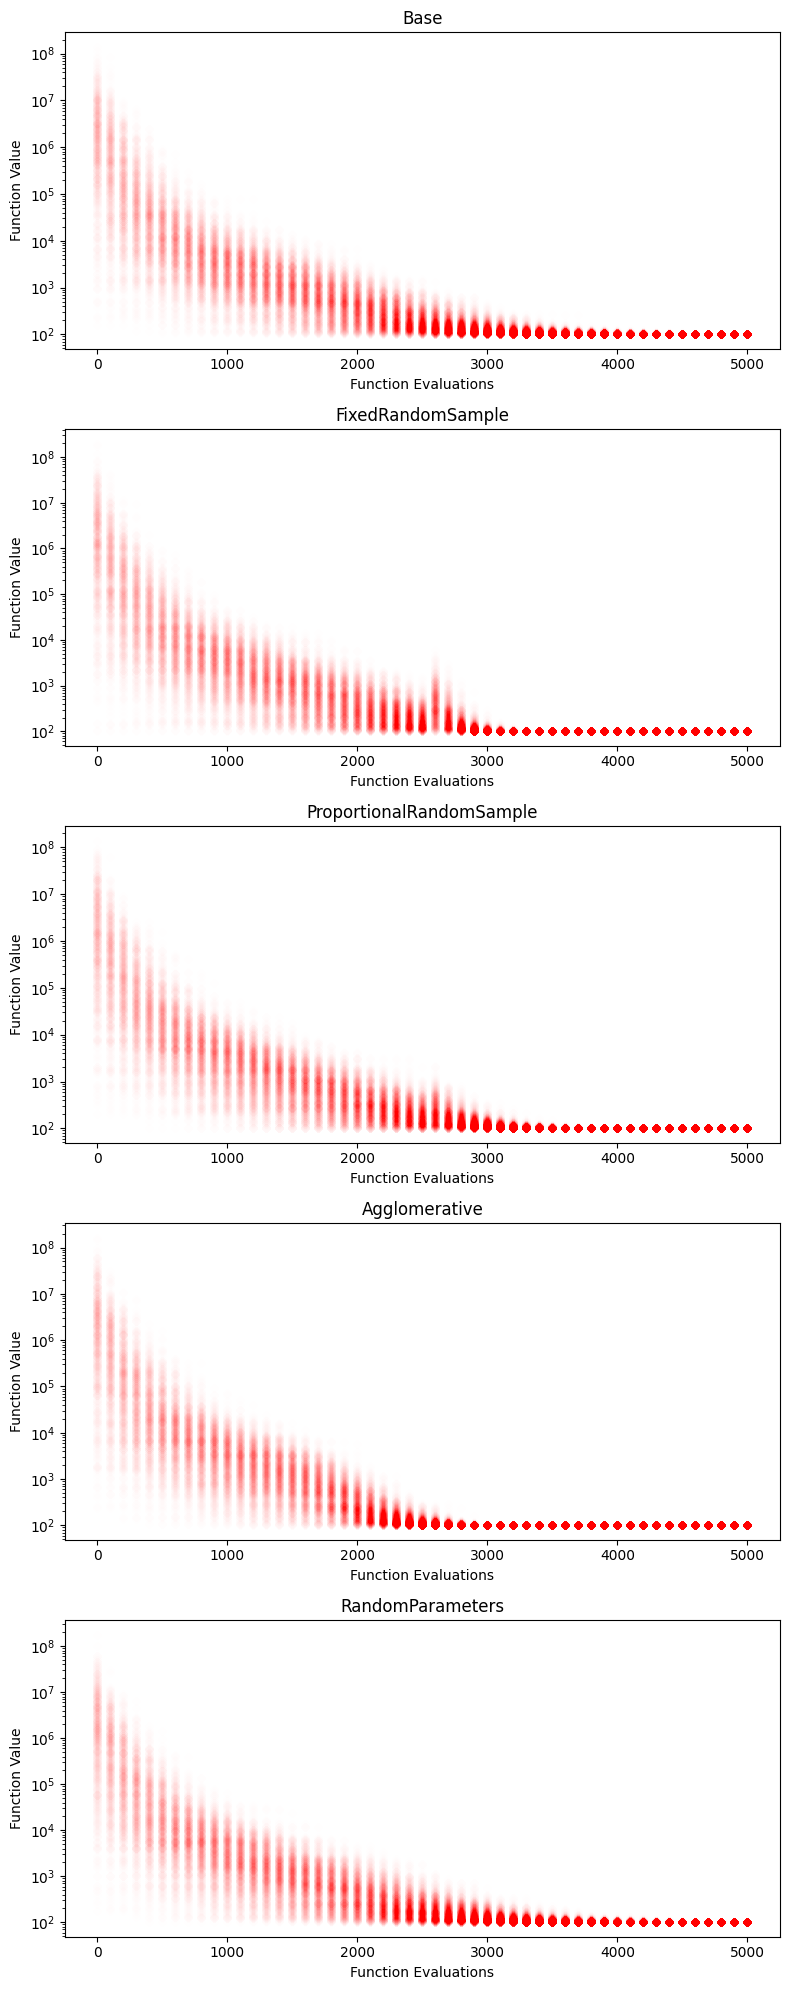

In [ ]:
NumberFunction = 1
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations,Y_Scale='log')

# F2

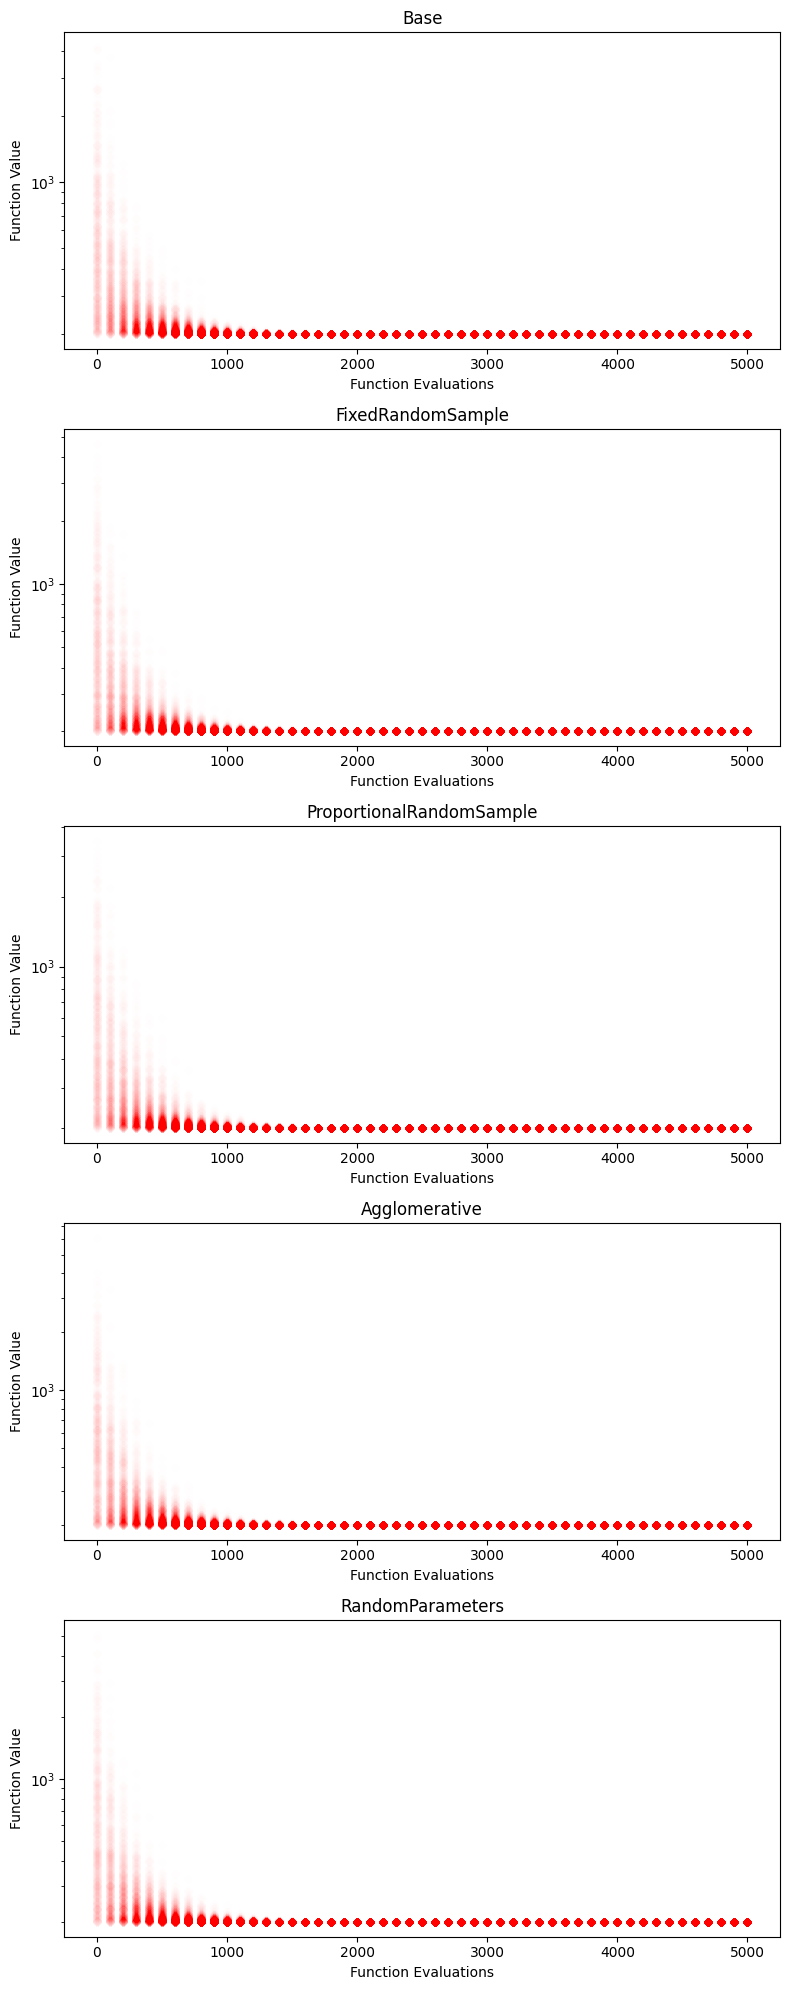

In [44]:
NumberFunction = 2
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations,Y_Scale='log')

# F3

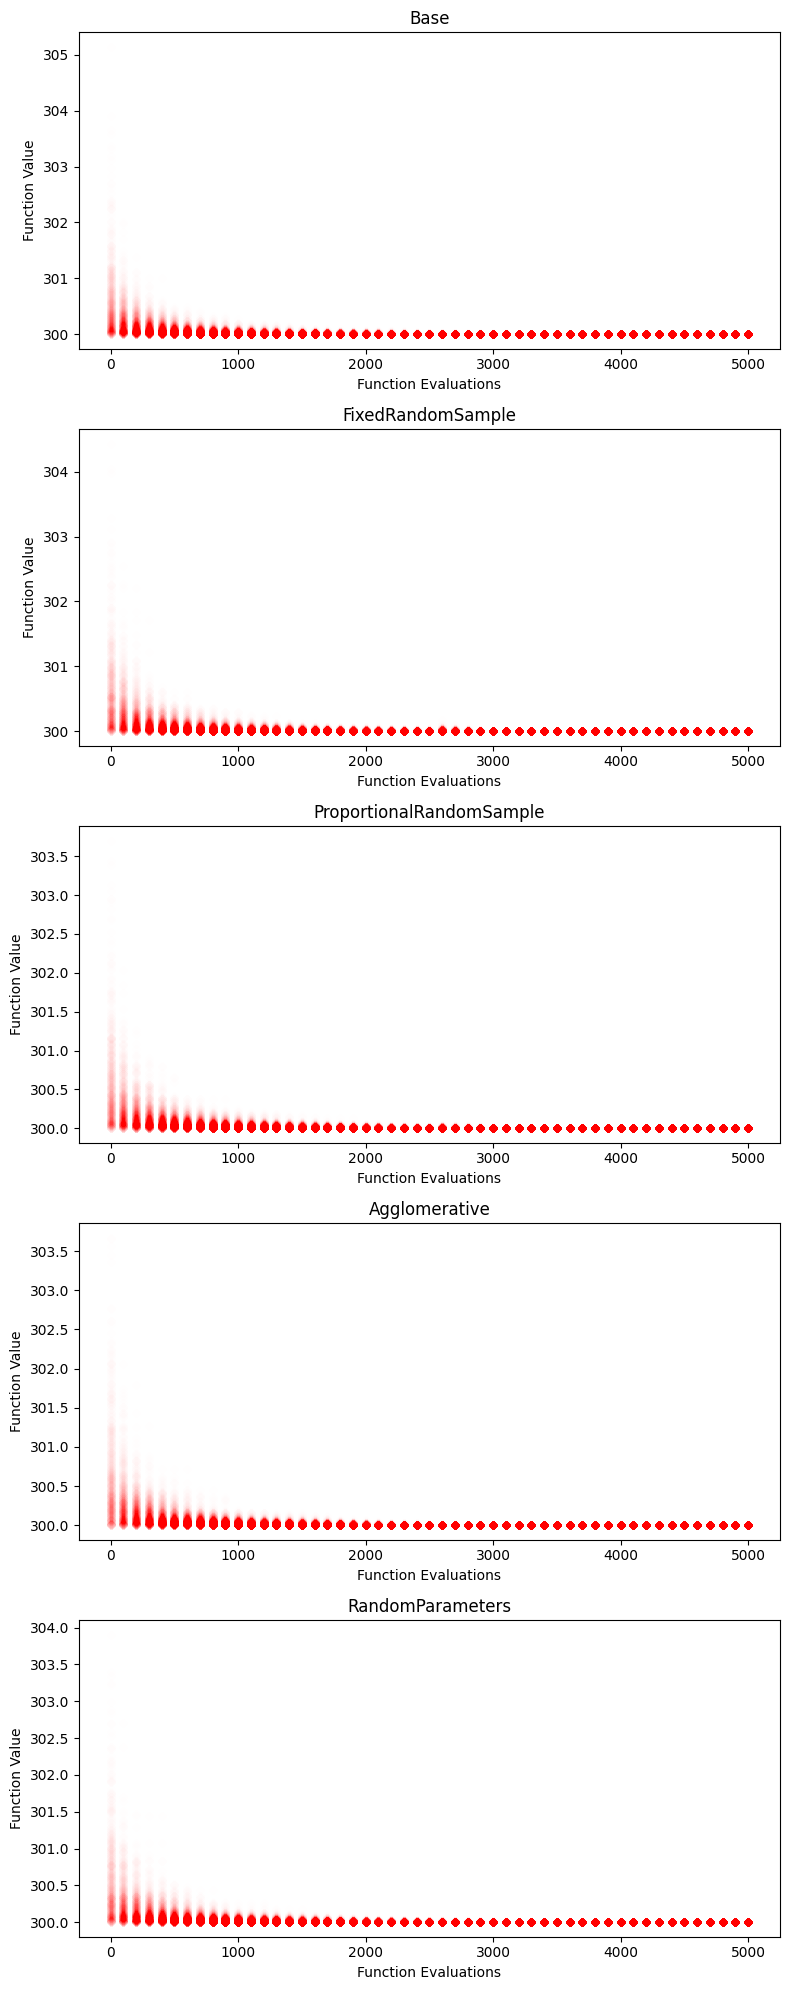

In [45]:
NumberFunction = 3
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F4

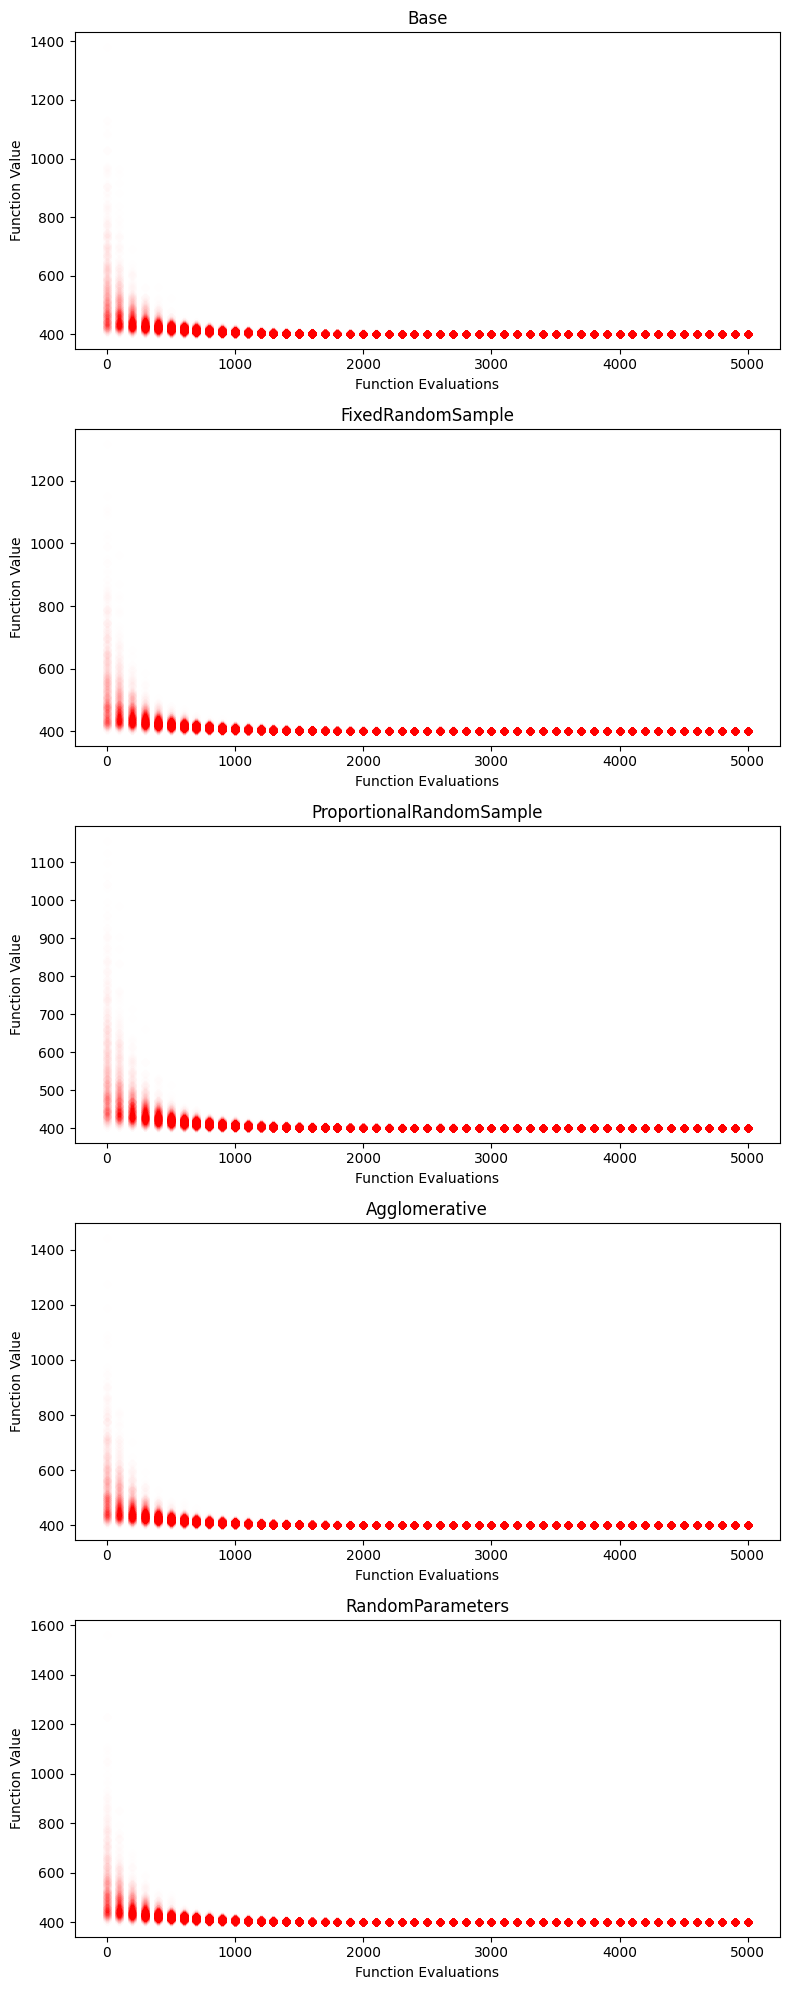

In [46]:
NumberFunction = 4
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F5

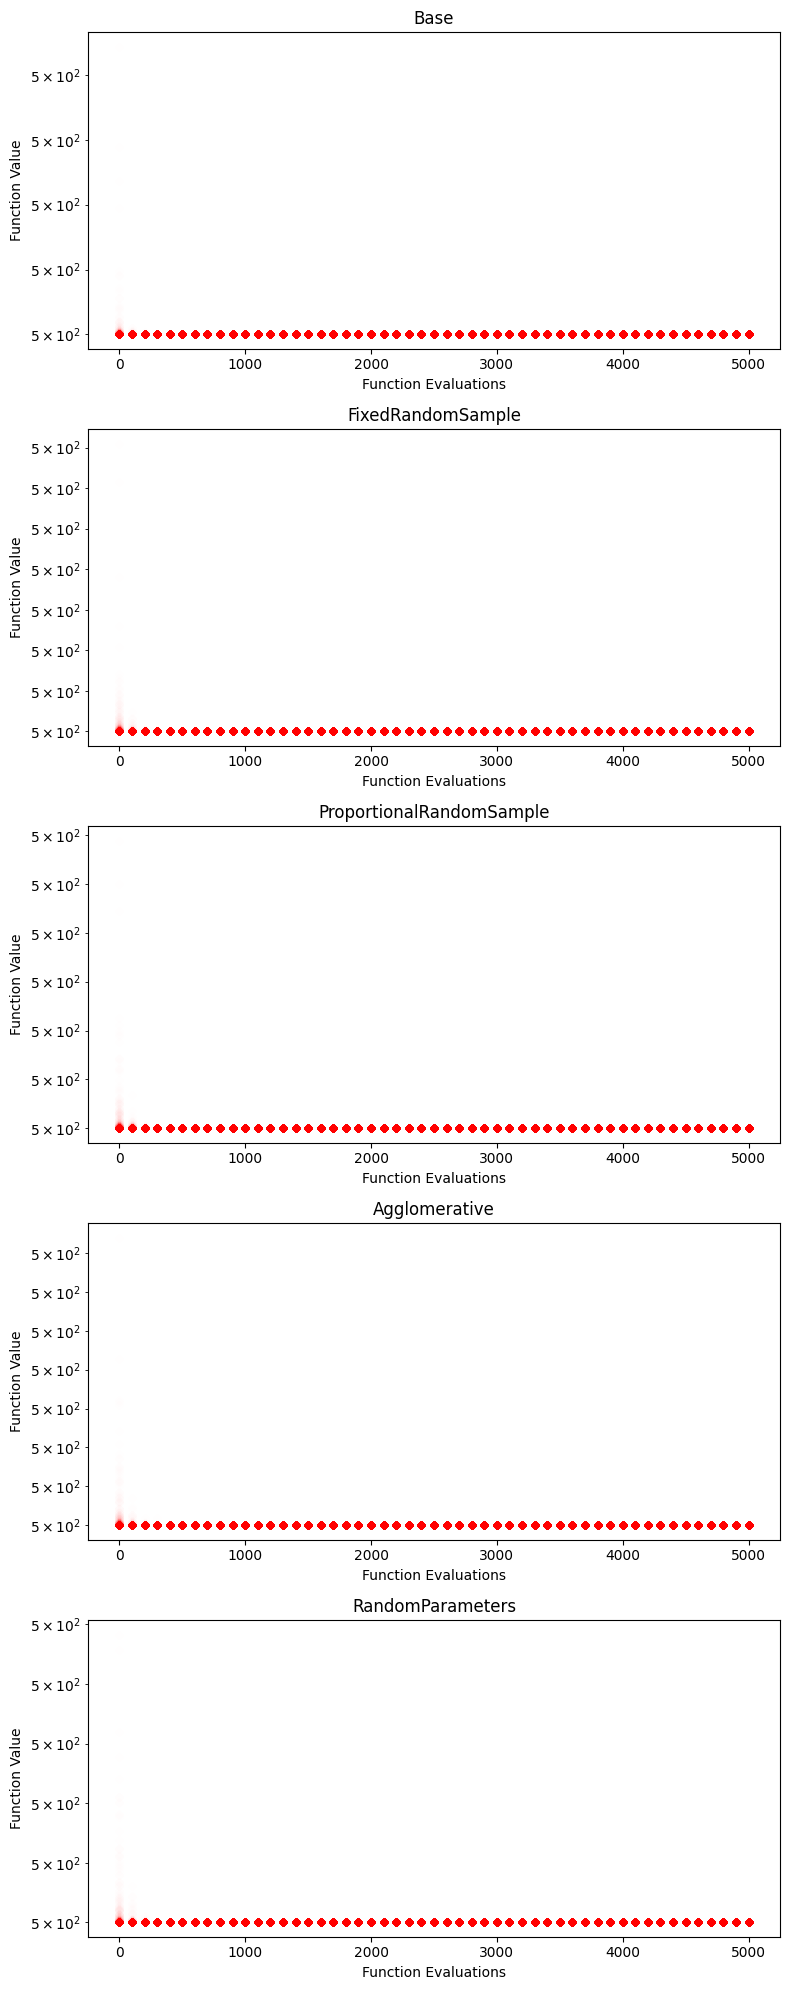

In [48]:
NumberFunction = 5
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations,Y_Scale='log')

# F6

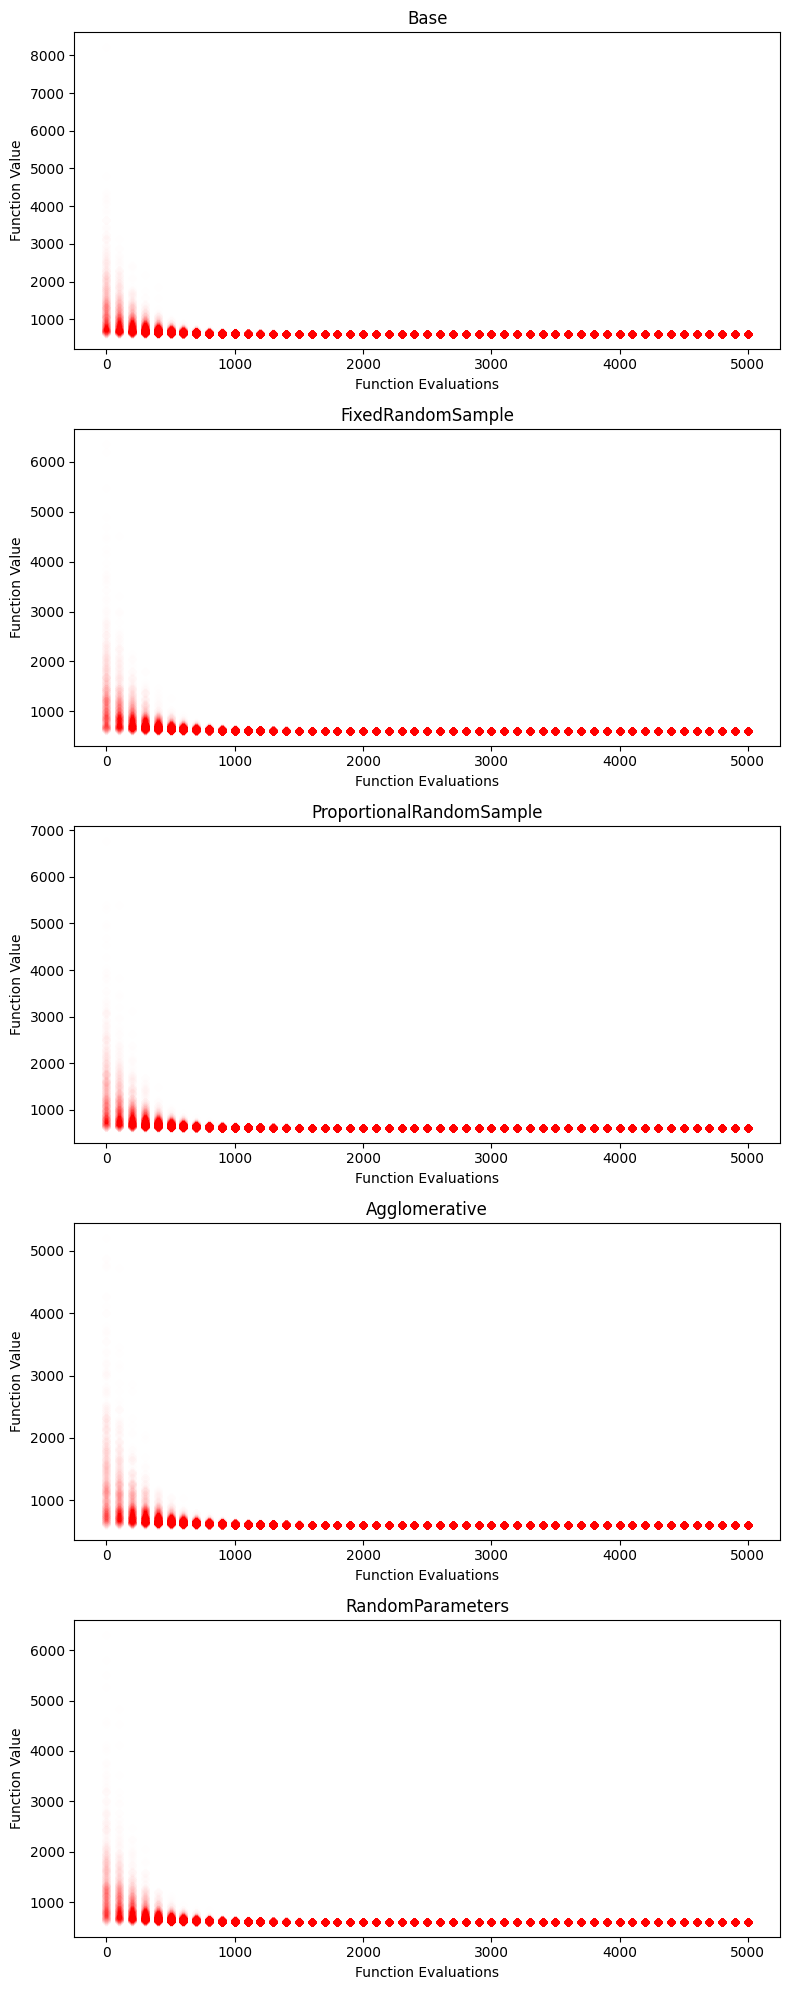

In [49]:
NumberFunction = 6
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F7

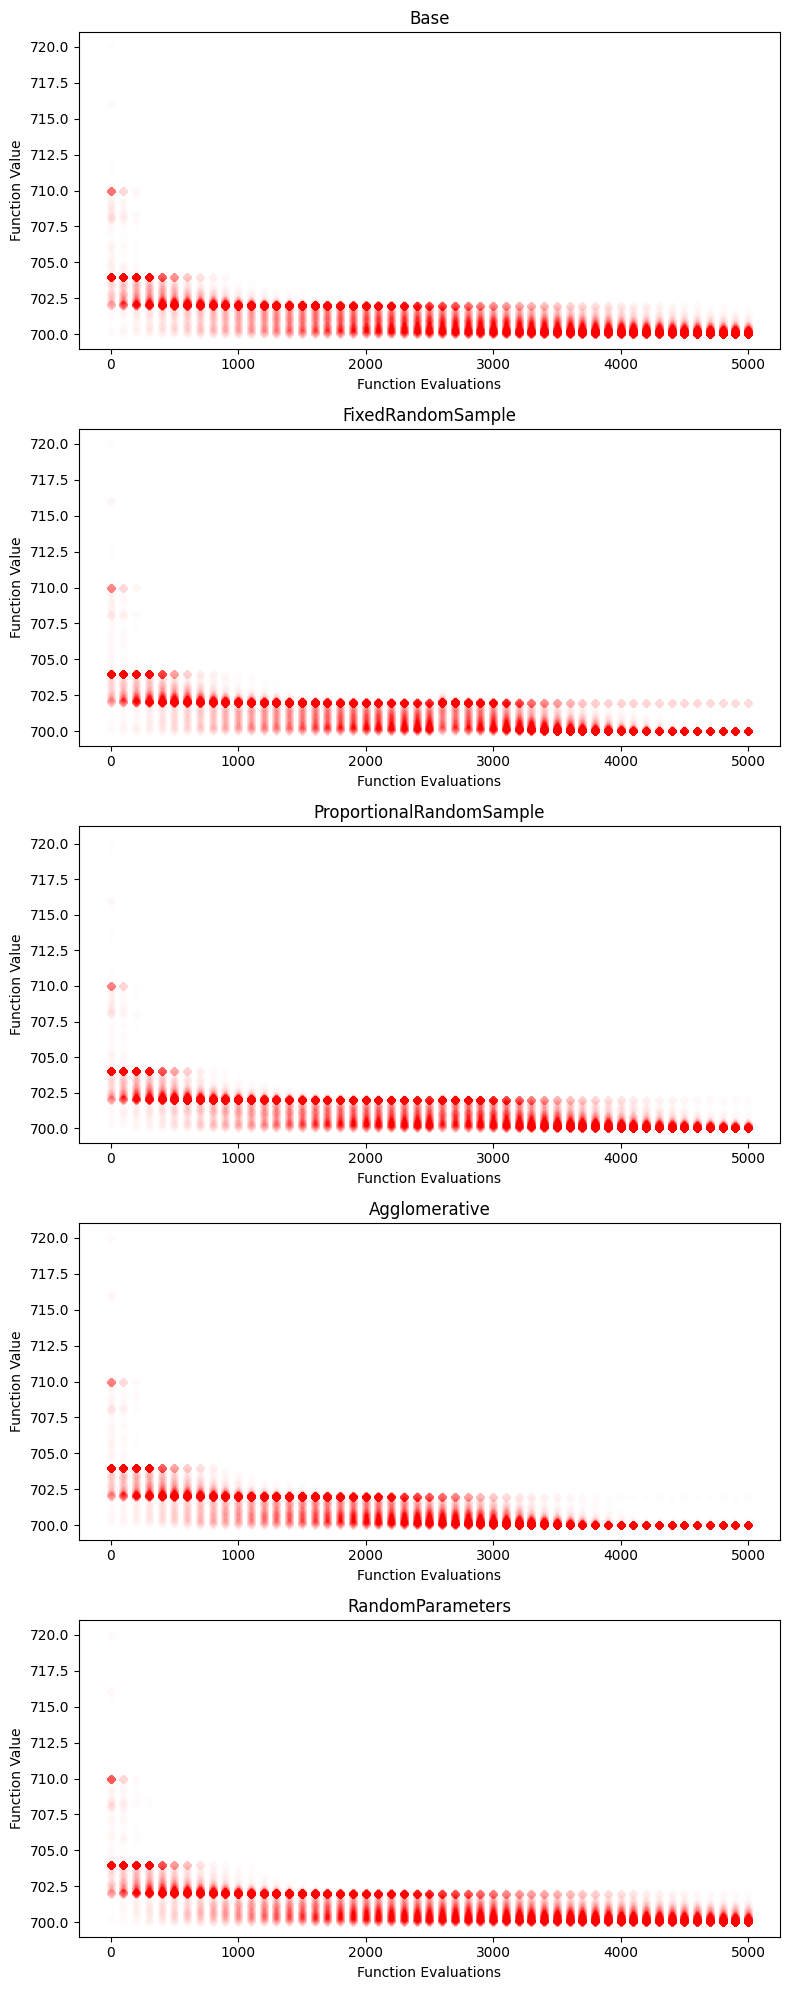

In [50]:
NumberFunction = 7
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F8

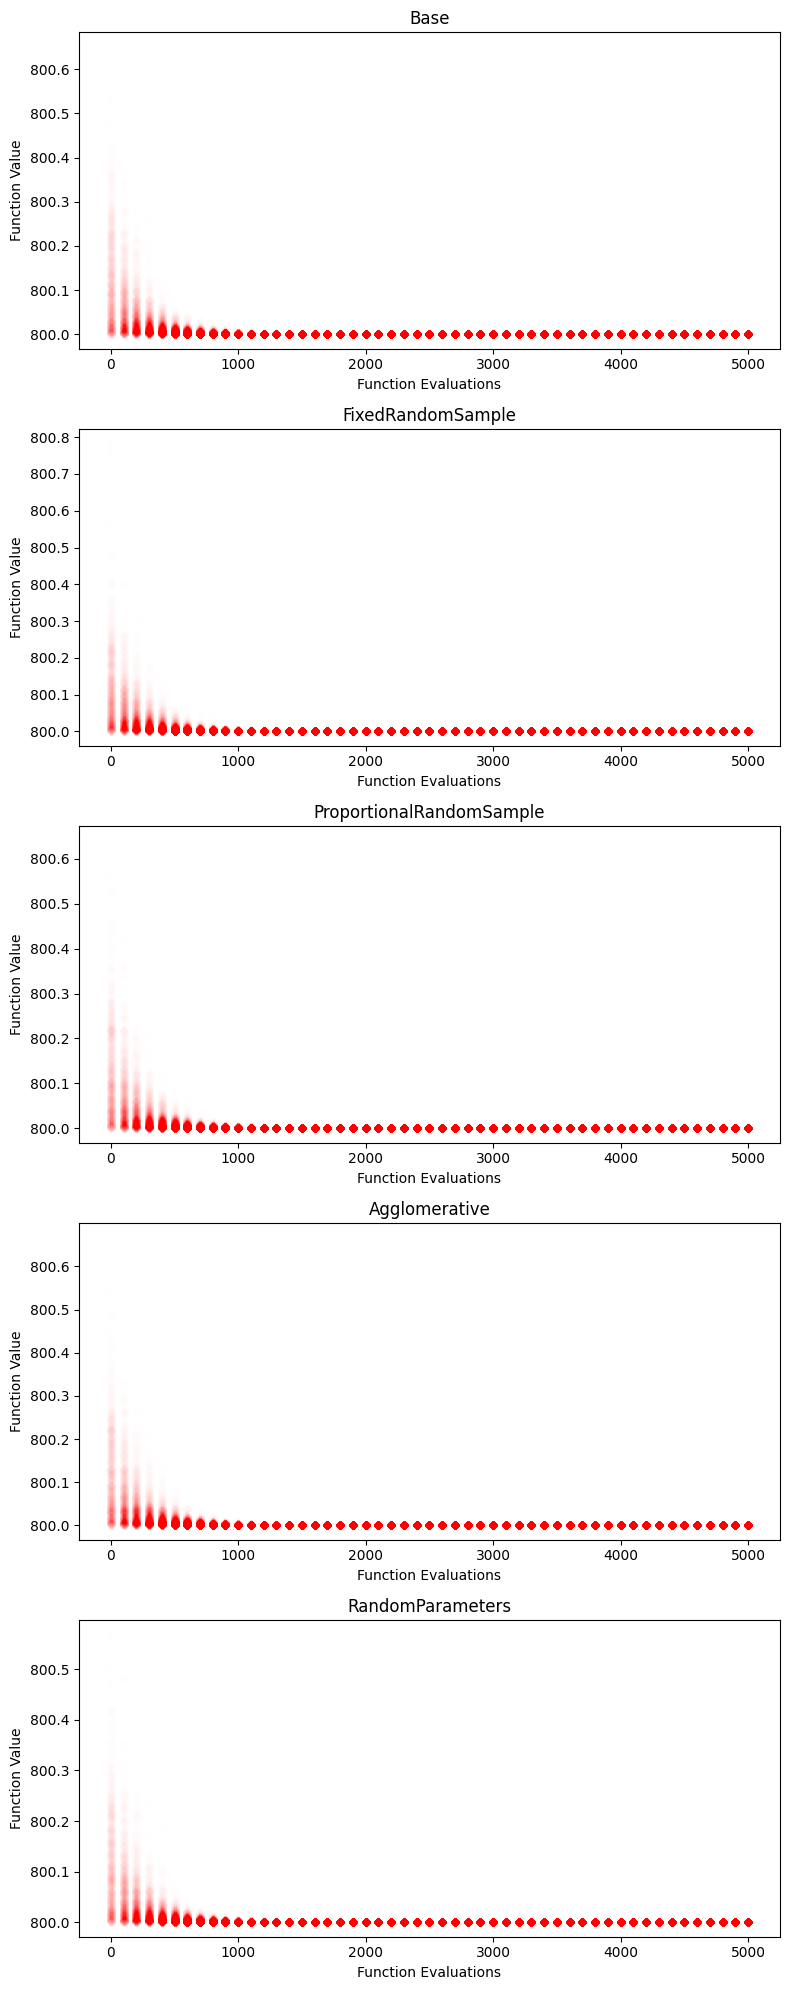

In [51]:
NumberFunction = 8
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F9

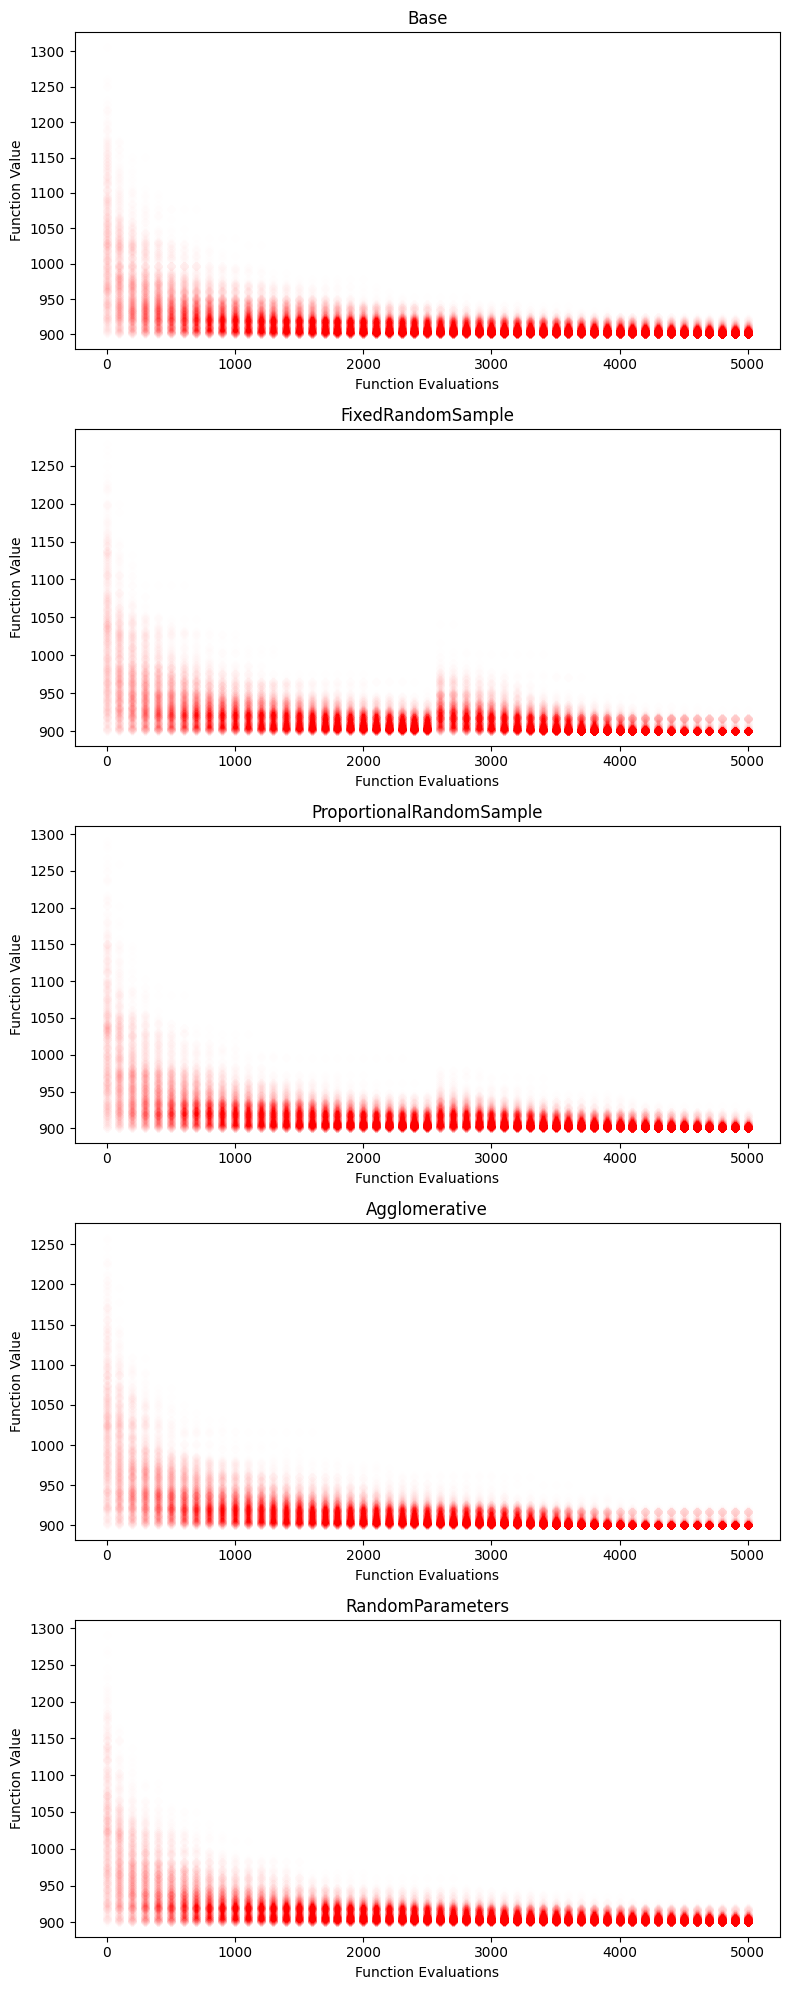

In [52]:
NumberFunction = 9
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)